## 芸人情報の定量分析

全ユニット情報から各芸人情報を取得し、誕生日・年齢・出身地・事務所・芸歴を比較

https://www.geireki.net/lists/member

In [1]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [2]:
folder_name_raw = "./data_additional/raw"
folder_name_tidy = "./data_additional/tidy"
print(os.path.exists(folder_name_raw))
print(os.path.exists(folder_name_tidy))

True
True


In [3]:
# User-Agent の設定
dummy_user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'


In [4]:
# コンビ一覧のルートURL
combi_url_root = "https://www.geireki.net/lists/member/combi?disband=1"

# 124ページに分かれているのでリストを作成
combi_urls = [combi_url_root]
for i in range(123):
    combi_urls.append(combi_url_root + f"&page={i+2}")
combi_urls

['https://www.geireki.net/lists/member/combi?disband=1',
 'https://www.geireki.net/lists/member/combi?disband=1&page=2',
 'https://www.geireki.net/lists/member/combi?disband=1&page=3',
 'https://www.geireki.net/lists/member/combi?disband=1&page=4',
 'https://www.geireki.net/lists/member/combi?disband=1&page=5',
 'https://www.geireki.net/lists/member/combi?disband=1&page=6',
 'https://www.geireki.net/lists/member/combi?disband=1&page=7',
 'https://www.geireki.net/lists/member/combi?disband=1&page=8',
 'https://www.geireki.net/lists/member/combi?disband=1&page=9',
 'https://www.geireki.net/lists/member/combi?disband=1&page=10',
 'https://www.geireki.net/lists/member/combi?disband=1&page=11',
 'https://www.geireki.net/lists/member/combi?disband=1&page=12',
 'https://www.geireki.net/lists/member/combi?disband=1&page=13',
 'https://www.geireki.net/lists/member/combi?disband=1&page=14',
 'https://www.geireki.net/lists/member/combi?disband=1&page=15',
 'https://www.geireki.net/lists/member/co

In [8]:
# ピン一覧のルートURL
pin_url_root = "https://www.geireki.net/lists/member/pin?disband=1"

# 78ページに分かれているのでリストを作成
pin_urls = [pin_url_root]
for i in range(77):
    pin_urls.append(pin_url_root + f"&page={i+2}")
pin_urls

['https://www.geireki.net/lists/member/pin?disband=1',
 'https://www.geireki.net/lists/member/pin?disband=1&page=2',
 'https://www.geireki.net/lists/member/pin?disband=1&page=3',
 'https://www.geireki.net/lists/member/pin?disband=1&page=4',
 'https://www.geireki.net/lists/member/pin?disband=1&page=5',
 'https://www.geireki.net/lists/member/pin?disband=1&page=6',
 'https://www.geireki.net/lists/member/pin?disband=1&page=7',
 'https://www.geireki.net/lists/member/pin?disband=1&page=8',
 'https://www.geireki.net/lists/member/pin?disband=1&page=9',
 'https://www.geireki.net/lists/member/pin?disband=1&page=10',
 'https://www.geireki.net/lists/member/pin?disband=1&page=11',
 'https://www.geireki.net/lists/member/pin?disband=1&page=12',
 'https://www.geireki.net/lists/member/pin?disband=1&page=13',
 'https://www.geireki.net/lists/member/pin?disband=1&page=14',
 'https://www.geireki.net/lists/member/pin?disband=1&page=15',
 'https://www.geireki.net/lists/member/pin?disband=1&page=16',
 'https:

In [12]:
# トリオ一覧のルートURL
trio_url_root = "https://www.geireki.net/lists/member/trio?disband=1"

# 11ページに分かれているのでリストを作成
trio_urls = [trio_url_root]
for i in range(10):
    trio_urls.append(trio_url_root + f"&page={i+2}")
trio_urls

['https://www.geireki.net/lists/member/trio?disband=1',
 'https://www.geireki.net/lists/member/trio?disband=1&page=2',
 'https://www.geireki.net/lists/member/trio?disband=1&page=3',
 'https://www.geireki.net/lists/member/trio?disband=1&page=4',
 'https://www.geireki.net/lists/member/trio?disband=1&page=5',
 'https://www.geireki.net/lists/member/trio?disband=1&page=6',
 'https://www.geireki.net/lists/member/trio?disband=1&page=7',
 'https://www.geireki.net/lists/member/trio?disband=1&page=8',
 'https://www.geireki.net/lists/member/trio?disband=1&page=9',
 'https://www.geireki.net/lists/member/trio?disband=1&page=10',
 'https://www.geireki.net/lists/member/trio?disband=1&page=11']

In [10]:
# グループ一覧のルートURL（1ページのみ）
group_url_root = "https://www.geireki.net/lists/member/group?disband=1"



In [16]:
# コンビ詳細ページへのURLリストを作成

combi_page_urls = []

for combi_url in combi_urls:
    request = requests.get(combi_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    combi_pages = soup.select("#top > div > div > div > table > tbody > tr")
    for combi_page in combi_pages:
        combi_page_a = combi_page.select_one("td:nth-child(1) > a")
        url = combi_page_a.get("href")
        combi_name = combi_page_a.get_text(strip=True)
        combi_page_urls.append({"unit_name": combi_name, "page_url": url})
    time.sleep(1)

combi_page_df = pd.DataFrame(combi_page_urls)
combi_page_df

,unit_name,page_url
0,アームストロング,https://www.geireki.net/entertainers/1
1,アイスクリーム,https://www.geireki.net/entertainers/2
2,アイデンティティ,https://www.geireki.net/entertainers/3
3,アイナラット,https://www.geireki.net/entertainers/4
4,アイロンヘッド,https://www.geireki.net/entertainers/5
...,...,...
1846,セッツァー,https://www.geireki.net/entertainers/3186
1847,レモンコマドリ,https://www.geireki.net/entertainers/3188
1848,まぐろ兄弟,https://www.geireki.net/entertainers/3189
1849,幸せのとり,https://www.geireki.net/entertainers/3194


In [19]:
# ピン詳細ページへのURLリストを作成

pin_page_urls = []

for combi_url in pin_urls:
    request = requests.get(combi_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    combi_pages = soup.select("#top > div > div > div > table > tbody > tr")
    for combi_page in combi_pages:
        combi_page_a = combi_page.select_one("td:nth-child(1) > a")
        url = combi_page_a.get("href")
        combi_name = combi_page_a.get_text(strip=True)
        pin_page_urls.append({"unit_name": combi_name, "page_url": url})
    time.sleep(1)

pin_page_df = pd.DataFrame(pin_page_urls)
pin_page_df

,unit_name,page_url
0,あぁ～しらき,https://www.geireki.net/entertainers/1847
1,R藤本,https://www.geireki.net/entertainers/1848
2,あいすけ,https://www.geireki.net/entertainers/1849
3,青木さやか,https://www.geireki.net/entertainers/1850
4,青木隆治,https://www.geireki.net/entertainers/1851
...,...,...
1162,リクロジー,https://www.geireki.net/entertainers/3185
1163,もじゃ,https://www.geireki.net/entertainers/3187
1164,マッスルオペラちゃん,https://www.geireki.net/entertainers/3190
1165,福はら777,https://www.geireki.net/entertainers/3192


In [20]:
# トリオ詳細ページへのURLリストを作成

trio_page_urls = []

for combi_url in trio_urls:
    request = requests.get(combi_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    combi_pages = soup.select("#top > div > div > div > table > tbody > tr")
    for combi_page in combi_pages:
        combi_page_a = combi_page.select_one("td:nth-child(1) > a")
        url = combi_page_a.get("href")
        combi_name = combi_page_a.get_text(strip=True)
        trio_page_urls.append({"unit_name": combi_name, "page_url": url})
    time.sleep(1)

trio_page_df = pd.DataFrame(trio_page_urls)
trio_page_df

,unit_name,page_url
0,ビックスモールン,https://www.geireki.net/entertainers/964
1,リンダカラー,https://www.geireki.net/entertainers/1277
2,青色1号,https://www.geireki.net/entertainers/1702
3,AKIKO,https://www.geireki.net/entertainers/1703
4,あしゅら,https://www.geireki.net/entertainers/1704
...,...,...
160,大阪男塾,https://www.geireki.net/entertainers/3124
161,ぎょねこ,https://www.geireki.net/entertainers/3134
162,さんさんず,https://www.geireki.net/entertainers/3157
163,アマルフィん,https://www.geireki.net/entertainers/3162


In [30]:
# グループ詳細ページへのURLリストを作成

group_page_urls = []

for combi_url in [group_url_root]:
    request = requests.get(combi_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    combi_pages = soup.select("#top > div > div > div > table > tbody > tr")
    for combi_page in combi_pages:
        combi_page_a = combi_page.select_one("td:nth-child(1) > a")
        url = combi_page_a.get("href")
        combi_name = combi_page_a.get_text(strip=True)
        group_page_urls.append({"unit_name": combi_name, "page_url": url})
    time.sleep(1)

group_page_df = pd.DataFrame(group_page_urls)
group_page_df

,unit_name,page_url
0,ぼる塾,https://www.geireki.net/entertainers/2970
1,ザ・ドリフターズ,https://www.geireki.net/entertainers/2971
2,ザ・プラン９,https://www.geireki.net/entertainers/2986
3,超新塾,https://www.geireki.net/entertainers/3006
4,ショウガールズ,https://www.geireki.net/entertainers/3137
5,ダウ９００００,https://www.geireki.net/entertainers/3139


In [31]:
combi_page_df["unit"] = "combi"
pin_page_df["unit"] = "pin"
trio_page_df["unit"] = "trio"
group_page_df["unit"] = "group"

unit_page_df = pd.concat([combi_page_df, pin_page_df, trio_page_df, group_page_df]).reset_index(drop=True)
unit_page_df

,unit_name,page_url,unit
0,アームストロング,https://www.geireki.net/entertainers/1,combi
1,アイスクリーム,https://www.geireki.net/entertainers/2,combi
2,アイデンティティ,https://www.geireki.net/entertainers/3,combi
3,アイナラット,https://www.geireki.net/entertainers/4,combi
4,アイロンヘッド,https://www.geireki.net/entertainers/5,combi
...,...,...,...
3184,ザ・ドリフターズ,https://www.geireki.net/entertainers/2971,group
3185,ザ・プラン９,https://www.geireki.net/entertainers/2986,group
3186,超新塾,https://www.geireki.net/entertainers/3006,group
3187,ショウガールズ,https://www.geireki.net/entertainers/3137,group


In [32]:
unit_page_df.to_csv(os.path.join(folder_name_raw, "unit_page.csv"), index=False)

In [4]:
unit_page_df = pd.read_csv(os.path.join(folder_name_raw, "unit_page.csv"))
unit_page_df

,unit_name,page_url,unit
0,アームストロング,https://www.geireki.net/entertainers/1,combi
1,アイスクリーム,https://www.geireki.net/entertainers/2,combi
2,アイデンティティ,https://www.geireki.net/entertainers/3,combi
3,アイナラット,https://www.geireki.net/entertainers/4,combi
4,アイロンヘッド,https://www.geireki.net/entertainers/5,combi
...,...,...,...
3184,ザ・ドリフターズ,https://www.geireki.net/entertainers/2971,group
3185,ザ・プラン９,https://www.geireki.net/entertainers/2986,group
3186,超新塾,https://www.geireki.net/entertainers/3006,group
3187,ショウガールズ,https://www.geireki.net/entertainers/3137,group


In [6]:
# ユニットページから芸人ページURLを取得

performer_page_urls = []

for i, row in unit_page_df.iterrows():
    unit_name = row["unit_name"]
    print(unit_name)
    page_url = row["page_url"]
    unit = row["unit"]
    request = requests.get(page_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    tbody = soup.select_one("#top > div > table")
    if tbody:
        member_td = tbody.find("th", string="メンバー").find_next_sibling()
        members = member_td.select("tbody > tr")
        for member in members:
            performer = member.select_one("td:nth-child(1) > a")
            performer_url = performer.get("href")
            performer_name = performer.get_text(strip=True)
            performer_page_urls.append({"unit_name": unit_name, "unit_url": page_url, "unit": unit, "performer_name": performer_name, "performer_url": performer_url})
    else:
        performer_page_urls.append({"unit_name": unit_name, "unit_url": page_url, "unit": unit, "performer_name": None, "performer_url": None})
    time.sleep(1)

performer_page_df = pd.DataFrame(performer_page_urls)
performer_page_df


アームストロング
アイスクリーム
アイデンティティ
アイナラット
アイロンヘッド
アインシュタイン
青芝金太・紋太
青芝フック・キック
青空一風・千風
青空一歩・三歩
青空球児・好児
青空千夜・一夜
青空東児・西児
あかいらか
あがすけ
暁照雄・光雄
あかぼし☆こぼし
赤もみじ
アキカン
あきげん
秋田一号・二号
秋田Aスケ・Bスケ
アキナ
秋山右楽・左楽
アクシャン
あくび虫
アゲイン
あご&きんぞう
浅草キッド
朝倉小松崎
あさり・かつお
あさりど
アジアントール
足軽エンペラー
東京二・京太
東京丸・京平
東ヤジロー・キタハチ
遊び屋
アッチャンズ
アッパレード
アップダウン
あどばるーん
ADVANCE
アナクロニスティック
アニマル梯団
あばれヌンチャク
アビリティモンキー
あひるちゃんスポンジクラブ
アホマイルド
あま福
アマレス兄弟
アミ・ボロロク・ホエ・デシェ・ジェテ・チャイ
雨上がり決死隊
アメデオ
アメリカザリガニ
アメリカンコミックス
あめん
アモーン
荒波部屋
ありがとう
アリtoキリギリス
ありんくりん
アルカリ三世
アルコ&ピース
アルファルファ
あわよくば
アンガールズ
アンカンミンカン
アンクルベイビー
アンジャッシュ
ANZEN漫才
アンダーエイジ
アンダーポイント
アンダーライン
アンタッチャブル
アントニオ
アンドロイド
アントワネット
アンバランス
あんぺあ
イアソン
いい塩梅
EE男
Yes-man
庵。
いかすぜジョナサン
粋なり
EXIT
いけないパラダイス
囲碁将棋
いきるゆうき
イシバシハザマ
いじわるコンビ
イタガキ
イタリアン・シガー・ブルドッグ
市原
いち・もく・さん
一輪亭花蝶・松原勝美
いつもここから
イナズマライン
いぬ
イヌがニャーと泣いた日
イヌコネクション
犬の心
井下好井
伊村製作所
入間国際宣言
イワイガワ
インディアンス
インディゴ
インデペンデンスデイ
インパルス
インポッシブル
ヴィレッジ
ういろうプリン
ヴィンテージ
ウーマンラッシュアワー
烏龍パーク
ヴェートーベン
上木総合研究所
ウエストランド
うえはまだ
ウェルダン
ウォーターズ
浮世亭出羽助・八丈竹幸
浮世亭柳平・とん平
うしろシティ
うすくら屋
うずしおパンチ
ウッチャンナンチャン
ウドントミカン
海原はるか・かなた
ウメボシ

,unit_name,unit_url,unit,performer_name,performer_url
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211
...,...,...,...,...,...
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008
2616,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009
2617,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010


In [7]:
performer_page_df.to_csv(os.path.join(folder_name_raw, "performer_page.csv"), index=False)

In [13]:
# 芸人ページから、誕生日・年齢・出身地・事務所・芸歴を取得

performer_data = []

for i, row in performer_page_df.iterrows():
    unit_name = row["unit_name"]
    unit_url = row["unit_url"]
    unit = row["unit"]
    performer_name = row["performer_name"]
    if i % 60 == 0:
        print(i, performer_name)
    performer_url = row["performer_url"]
    if not performer_url:
        print("skipped")
        continue
    request = requests.get(performer_url, headers={"User-Agent": dummy_user_agent}, timeout=10)
    soup = BeautifulSoup(request.text, "html.parser")
    tbody = soup.select_one("#top > div > table")
    if tbody:
        birthday = tbody.find("th", string="誕生日").find_next_sibling().get_text(strip=True)
        age = tbody.find("th", string="年齢").find_next_sibling().get_text(strip=True)
        birthplace = tbody.find("th", string="出身地").find_next_sibling().get_text(strip=True)
        office = tbody.find("th", string="事務所").find_next_sibling().get_text(strip=True)
        history = tbody.find("th", string="芸歴").find_next_sibling().get_text(strip=True)
        performer_data.append({"unit_name": unit_name, "unit_url": unit_url, "unit": unit, "performer_name": performer_name, "performer_url": performer_url,
                               "birthday": birthday, "age": age, "birthplace": birthplace, "office": office, "history": history})
    else:
        performer_data.append({"unit_name": unit_name, "unit_url": unit_url, "unit": unit, "performer_name": performer_name, "performer_url": performer_url,
                               "birthday": None, "age": None, "birthplace": None, "office": None, "history": None})
    time.sleep(1)
    

performer_data_df = pd.DataFrame(performer_data)
performer_data_df


0 くり
60 黒川忠文
120 杉山栄一
180 益田康平
240 橋本直
300 坂上二郎
360 お～い!久馬
420 勝呂 祐介
480 水口靖一郎
540 草山公汰
600 ぜんじろう
660 江口直人
720 みながわ
780 新垣6（しんがきしっくす）
skipped
840 田崎佑一
900 関仁彦
960 盛山晋太郎
skipped
1020 片桐仁
1080 おかゆ太郎
1140 くわばたりえ
1200 安藤なつ
1260 わたあめりな
1320 細野 祐作
1380 ちばけん
1440 澤畑 健二
1500 かつやま
1560 つるまる
1620 あそどっぐ
1680 上原チョー
1740 カステラ一番
1800 けーすけ
1860 サツマカワRPG
1920 鈴木つかさ
1980 たむらけんじ
2040 中川貴志
2100 花香よしあき
2160 フランキー為谷
2220 マリリンジョイ
2280 やなぎ浩二
2340 ルシファー吉岡
2400 たいこー
2460 大ちゃん（峰本）
2520 黒沢かずこ
2580 塾長


,unit_name,unit_url,unit,performer_name,performer_url,birthday,age,birthplace,office,history
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703,1981年 08月 04日,43歳,北海道旭川市,フリー,25年目
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379,1982年 03月 15日,42歳,北海道旭川市,吉本興業,25年目
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066,1980年 06月 11日,44歳,滋賀県草津市,吉本興業,25年目
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990,1984年 09月 20日,40歳,広島県呉市,太田プロダクション,20年目
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211,1984年 05月 11日,40歳,-,太田プロダクション,20年目
...,...,...,...,...,...,...,...,...,...,...
2612,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007,1998年 10月 02日,26歳,タイ,その他,5年目
2613,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008,1998年 10月 06日,26歳,神奈川県,その他,5年目
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009,1999年 04月 10日,25歳,兵庫県,その他,5年目
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010,1999年 08月 21日,25歳,福岡県,その他,5年目


In [14]:
performer_data_df.to_csv(os.path.join(folder_name_raw, "performer_data.csv"), index=False)


In [34]:
import re

In [66]:
# 「歳」、「年目」の削除
def extract_num(text):
    match = re.search(r"\d+", text)
    if match:
        return int(match.group(0))
    else:
        if text != "":
            print(f"no num in {text}")
        return None
    

# 都道府県名の抽出
def extract_pref(text):
    match = re.search(r"(北海道|青森|岩手|宮城|秋田|山形|福島|茨城|栃木|群馬|埼玉|千葉|東京|神奈川|新潟|富山|石川|福井|山梨|長野|岐阜|静岡|愛知|三重|滋賀|京都|大阪|兵庫|奈良|和歌山|鳥取|島根|岡山|広島|山口|徳島|香川|愛媛|高知|福岡|佐賀|長崎|熊本|大分|宮崎|鹿児島|沖縄|横浜)", text)
    if match:
        pref = match.group(1)
        if pref == "横浜":
            return "神奈川"
        else:
            return pref
    else:
        if text != "-":
            print(f"no pref in {text}")
        return None


In [69]:
performer_data_df_trimmed = performer_data_df.copy()
performer_data_df_trimmed["age"] = performer_data_df_trimmed["age"].apply(extract_num)
performer_data_df_trimmed["history"] = performer_data_df_trimmed["history"].apply(extract_num)
performer_data_df_trimmed["birthplace"] = performer_data_df_trimmed["birthplace"].apply(extract_pref)
performer_data_df_trimmed

no pref in ケニア・ナイロビ
no pref in ドイツ
no pref in 香港
no pref in アメリカ合衆国ニューヨーククイーンズ
no pref in さるひげ星
no pref in 日本
no pref in 日本
no pref in アメリカ合衆国・コロラド州コロラドスプリングス
no pref in アメリカ合衆国 ハワイ州マウイ島
no pref in ジョウト地方
no pref in ?驪ﾊ県蕨市
no pref in アメリカ合衆国
no pref in ジョウト地方
no pref in ジョウト地方
no pref in 兵?ﾉ県高砂市
no pref in ロンドン
no pref in アメリカ合衆国 ミシガン州
no pref in 日本
no pref in ラトビア・ソビエト社会主義共和国 リガ市
no pref in 日本
no pref in 銀河
no pref in 日本
no pref in オレゴン州
no pref in ケニア・ナイロビ
no pref in 山県県
no pref in 岩田健盛岡市
no pref in アメリカ合衆国・ニューヨーク州マンハッタン区
no pref in 日本大学芸術学部映画学科演技コース
no pref in タイ


,unit_name,unit_url,unit,performer_name,performer_url,birthday,age,birthplace,office,history
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703,1981年 08月 04日,43,北海道,フリー,25.0
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379,1982年 03月 15日,42,北海道,吉本興業,25.0
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066,1980年 06月 11日,44,滋賀,吉本興業,25.0
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990,1984年 09月 20日,40,広島,太田プロダクション,20.0
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211,1984年 05月 11日,40,None,太田プロダクション,20.0
...,...,...,...,...,...,...,...,...,...,...
2612,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007,1998年 10月 02日,26,None,その他,5.0
2613,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008,1998年 10月 06日,26,神奈川,その他,5.0
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009,1999年 04月 10日,25,兵庫,その他,5.0
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010,1999年 08月 21日,25,福岡,その他,5.0


In [87]:
# No dataが0歳になっているのでNoneに
performer_data_df_trimmed.loc[performer_data_df_trimmed["age"] == 0, "age"] = None
performer_data_df_trimmed

,unit_name,unit_url,unit,performer_name,performer_url,birthday,age,birthplace,office,history
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703,1981年 08月 04日,43.0,北海道,フリー,25.0
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379,1982年 03月 15日,42.0,北海道,吉本興業,25.0
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066,1980年 06月 11日,44.0,滋賀,吉本興業,25.0
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990,1984年 09月 20日,40.0,広島,太田プロダクション,20.0
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211,1984年 05月 11日,40.0,None,太田プロダクション,20.0
...,...,...,...,...,...,...,...,...,...,...
2612,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007,1998年 10月 02日,26.0,None,その他,5.0
2613,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008,1998年 10月 06日,26.0,神奈川,その他,5.0
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009,1999年 04月 10日,25.0,兵庫,その他,5.0
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010,1999年 08月 21日,25.0,福岡,その他,5.0


In [153]:
# 都道府県を付与（変な文字列は想定していない）
def add_todofuken(pref):
    if pref:
        if pref == "東京":
            return pref + "都"
        elif pref == "京都" or pref == "大阪":
            return pref + "府"
        elif pref == "北海道":
            return pref
        else:
            return pref + "県"
    else: 
        return None

In [157]:
performer_data_df_trimmed["birthplace"] = performer_data_df_trimmed["birthplace"].apply(add_todofuken)
performer_data_df_trimmed

,unit_name,unit_url,unit,performer_name,performer_url,birthday,age,birthplace,office,history
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703,1981年 08月 04日,43.0,北海道,フリー,25.0
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379,1982年 03月 15日,42.0,北海道,吉本興業,25.0
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066,1980年 06月 11日,44.0,滋賀県,吉本興業,25.0
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990,1984年 09月 20日,40.0,広島県,太田プロダクション,20.0
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211,1984年 05月 11日,40.0,None,太田プロダクション,20.0
...,...,...,...,...,...,...,...,...,...,...
2612,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007,1998年 10月 02日,26.0,None,その他,5.0
2613,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008,1998年 10月 06日,26.0,神奈川県,その他,5.0
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009,1999年 04月 10日,25.0,兵庫県,その他,5.0
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010,1999年 08月 21日,25.0,福岡県,その他,5.0


In [163]:
# to_csv
performer_data_df_trimmed.to_csv(os.path.join(folder_name_tidy, "performer_data_trimmed.csv"), index=False)

In [190]:
# performerの重複を削除

performer_data_df_noDup = performer_data_df_trimmed.drop_duplicates(subset="performer_url", keep="first")
performer_data_df_noDup

,unit_name,unit_url,unit,performer_name,performer_url,birthday,age,birthplace,office,history
0,アームストロング,https://www.geireki.net/entertainers/1,combi,くり,https://www.geireki.net/perfomers/703,1981年 08月 04日,43.0,北海道,フリー,25.0
1,アームストロング,https://www.geireki.net/entertainers/1,combi,とにかく明るい安村,https://www.geireki.net/perfomers/1379,1982年 03月 15日,42.0,北海道,吉本興業,25.0
2,アイスクリーム,https://www.geireki.net/entertainers/2,combi,ムーディ勝山,https://www.geireki.net/perfomers/2066,1980年 06月 11日,44.0,滋賀県,吉本興業,25.0
3,アイデンティティ,https://www.geireki.net/entertainers/3,combi,見浦彰彦,https://www.geireki.net/perfomers/1990,1984年 09月 20日,40.0,広島県,太田プロダクション,20.0
4,アイデンティティ,https://www.geireki.net/entertainers/3,combi,田島直弥,https://www.geireki.net/perfomers/1211,1984年 05月 11日,40.0,None,太田プロダクション,20.0
...,...,...,...,...,...,...,...,...,...,...
2612,ダウ９００００,https://www.geireki.net/entertainers/3139,group,道上 珠妃,https://www.geireki.net/perfomers/3007,1998年 10月 02日,26.0,None,その他,5.0
2613,ダウ９００００,https://www.geireki.net/entertainers/3139,group,上原 佑太,https://www.geireki.net/perfomers/3008,1998年 10月 06日,26.0,神奈川県,その他,5.0
2614,ダウ９００００,https://www.geireki.net/entertainers/3139,group,忽那 文香,https://www.geireki.net/perfomers/3009,1999年 04月 10日,25.0,兵庫県,その他,5.0
2615,ダウ９００００,https://www.geireki.net/entertainers/3139,group,中島 百依子,https://www.geireki.net/perfomers/3010,1999年 08月 21日,25.0,福岡県,その他,5.0


※都道府県の緯度経度データは
https://github.com/dataofjapan/land/blob/master/prefecturalCapital.csv
から取得。

In [258]:
# 緯度経度データの用意
from japanmap import pref_code

df_latlon = pd.read_csv(os.path.join(folder_name_tidy, "prefecturalCapital.csv"))[["nam_ja", "lat", "lon"]].copy()
df_latlon["nam_ja"] = df_latlon["nam_ja"].apply(add_todofuken)
df_latlon["pref_code"] = df_latlon["nam_ja"].apply(pref_code)
df_latlon

,nam_ja,lat,lon,pref_code
0,北海道,43.064359,141.347449,1
1,青森県,40.824294,140.740054,2
2,岩手県,39.703530,141.152667,3
3,宮城県,38.268737,140.872183,4
4,秋田県,39.718175,140.103356,5
5,山形県,38.240127,140.362533,6
6,福島県,37.750146,140.466754,7
7,茨城県,36.341817,140.446796,8
8,栃木県,36.565750,139.883526,9
9,群馬県,36.391205,139.060917,10


#### 都道府県ごとの「芸人の人数」

In [259]:
performer_num = pd.DataFrame(performer_data_df_noDup["birthplace"].value_counts()).reset_index().merge(df_latlon, left_on="birthplace", right_on="nam_ja")
performer_num

,birthplace,count,nam_ja,lat,lon,pref_code
0,大阪府,389,大阪府,34.686492,135.518992,27
1,東京都,303,東京都,35.689185,139.691648,13
2,兵庫県,160,兵庫県,34.691280,135.183087,28
3,神奈川県,134,神奈川県,35.447505,139.642347,14
4,埼玉県,114,埼玉県,35.857771,139.647804,11
5,福岡県,89,福岡県,33.606767,130.418228,40
6,京都府,83,京都府,35.020996,135.753114,26
7,愛知県,70,愛知県,35.180247,136.906698,23
8,千葉県,69,千葉県,35.604563,140.123179,12
9,北海道,67,北海道,43.064359,141.347449,1


In [261]:
# 日本地図上にプロット
import plotly.express as px

# バブルチャートを描画
fig = px.scatter_mapbox(
    performer_num,
    lat="lat",  # 緯度
    lon="lon",  # 経度
    size="count",  # バブルの大きさ
    hover_name="birthplace",  # ホバー時に表示する都道府県名
    title="都道府県ごとの「芸人の人数」",
    mapbox_style="carto-positron",  # 軽量な背景地図スタイル
    zoom=3.5,  # ズームレベル
    center={"lat": 36, "lon": 137}  # 日本を中心に設定
)

fig.update_layout(
    width = 500,
    height = 600
)

# 表示
fig.show()

In [267]:
# 見づらいのでヒートマップに
geojson_url = "https://raw.githubusercontent.com/dataofjapan/land/master/japan.geojson"

fig = px.choropleth(
    performer_num,
    geojson=geojson_url,
    locations="birthplace",
    featureidkey="properties.nam_ja",  # GeoJSON の都道府県名キー
    color="count",
    color_continuous_scale="Blues",
    title="ヒートマップ"
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.show()


In [266]:
# 見づらいのでplotlyを諦める
import matplotlib.pyplot as plt
from japanmap import picture

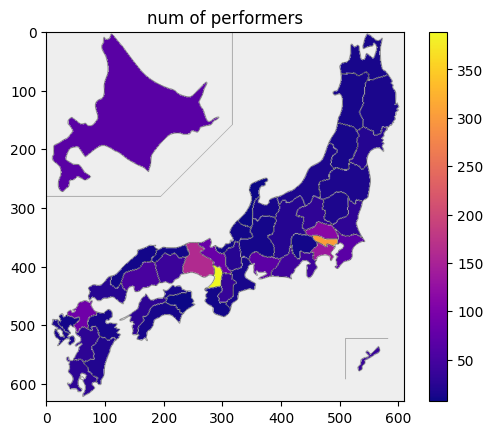

In [269]:
# heatmap
df = performer_num.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["count"].min(), vmax=df["count"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["count"].apply(fcol))
plt.title("num of performers")
plt.colorbar(plt.imshow(pic, cmap, norm))

#### 都道府県ごとの「芸人の人数/人口」
各都道府県の人口データは https://github.com/code4fukui/population_jp から取得（2019年のデータ）

In [270]:
# 各都道府県の人口データ
df_pop = pd.read_csv(os.path.join(folder_name_tidy, "population_jp.csv"))[["name_jp", "population_jp"]].copy()
#df_pop["name_jp"] = df_pop["name_jp"].apply(extract_pref)
df_pop

,name_jp,population_jp
0,北海道,5250000
1,青森県,1246000
2,岩手県,1227000
3,宮城県,2306000
4,秋田県,966000
5,山形県,1078000
6,福島県,1846000
7,茨城県,2860000
8,栃木県,1934000
9,群馬県,1942000


In [271]:
performer_density = performer_num.merge(df_pop, left_on="birthplace", right_on="name_jp")
performer_density["density"] = performer_density["count"] / performer_density["population_jp"]
performer_density

,birthplace,count,nam_ja,lat,lon,pref_code,name_jp,population_jp,density
0,大阪府,389,大阪府,34.686492,135.518992,27,大阪府,8809000,0.000044
1,東京都,303,東京都,35.689185,139.691648,13,東京都,13921000,0.000022
2,兵庫県,160,兵庫県,34.691280,135.183087,28,兵庫県,5466000,0.000029
3,神奈川県,134,神奈川県,35.447505,139.642347,14,神奈川県,9198000,0.000015
4,埼玉県,114,埼玉県,35.857771,139.647804,11,埼玉県,7350000,0.000016
5,福岡県,89,福岡県,33.606767,130.418228,40,福岡県,5104000,0.000017
6,京都府,83,京都府,35.020996,135.753114,26,京都府,2583000,0.000032
7,愛知県,70,愛知県,35.180247,136.906698,23,愛知県,7552000,0.000009
8,千葉県,69,千葉県,35.604563,140.123179,12,千葉県,6259000,0.000011
9,北海道,67,北海道,43.064359,141.347449,1,北海道,5250000,0.000013


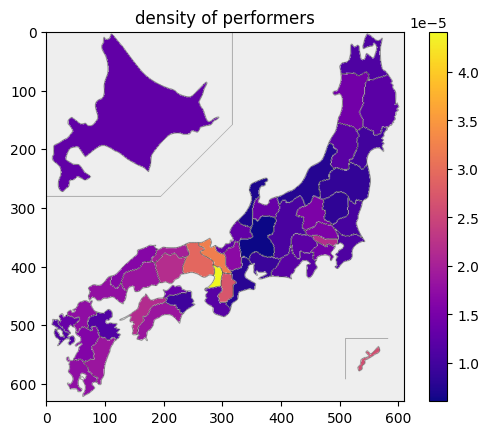

In [272]:
# heatmap
df = performer_density.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["density"].min(), vmax=df["density"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["density"].apply(fcol))
plt.title("density of performers")
plt.colorbar(plt.imshow(pic, cmap, norm))

#### 都道府県ごとの「芸人の平均年齢」


In [273]:
performer_age = performer_data_df_noDup[["birthplace", "age"]].groupby("birthplace").mean().reset_index()
performer_age = pd.merge(performer_age, df_latlon, left_on="birthplace", right_on="nam_ja").sort_values("age")
performer_age

,birthplace,age,nam_ja,lat,lon,pref_code
25,新潟県,38.235294,新潟県,37.901699,139.022728,15
36,秋田県,38.461538,秋田県,39.718175,140.103356,5
24,愛知県,39.971429,愛知県,35.180247,136.906698,23
16,山梨県,40.200000,山梨県,35.665102,138.568985,19
12,宮崎県,40.350000,宮崎県,31.911090,131.423855,45
41,青森県,40.428571,青森県,40.824294,140.740054,2
35,福島県,40.625000,福島県,37.750146,140.466754,7
28,沖縄県,40.736842,沖縄県,26.211538,127.681115,47
19,岩手県,41.000000,岩手県,39.703530,141.152667,3
13,富山県,41.214286,富山県,36.695274,137.211302,16


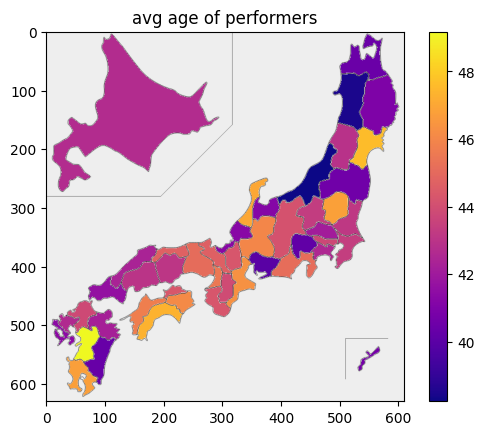

In [274]:
# heatmap
df = performer_age.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["age"].min(), vmax=df["age"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["age"].apply(fcol))
plt.title("avg age of performers")
plt.colorbar(plt.imshow(pic, cmap, norm))

#### 都道府県ごとの「芸人の平均芸歴」


In [275]:
performer_history = performer_data_df_noDup[["birthplace", "history"]].groupby("birthplace").mean().reset_index()
performer_history = pd.merge(performer_history, df_latlon, left_on="birthplace", right_on="nam_ja").sort_values("history")
performer_history

,birthplace,history,nam_ja,lat,lon,pref_code
16,山梨県,16.777778,山梨県,35.665102,138.568985,19
14,山口県,17.238095,山口県,34.185648,131.470755,35
36,秋田県,17.307692,秋田県,39.718175,140.103356,5
28,沖縄県,17.685714,沖縄県,26.211538,127.681115,47
35,福島県,18.000000,福島県,37.750146,140.466754,7
24,愛知県,18.049180,愛知県,35.180247,136.906698,23
25,新潟県,18.250000,新潟県,37.901699,139.022728,15
12,宮崎県,18.368421,宮崎県,31.911090,131.423855,45
33,福井県,18.900000,福井県,36.065220,136.221641,18
13,富山県,19.307692,富山県,36.695274,137.211302,16


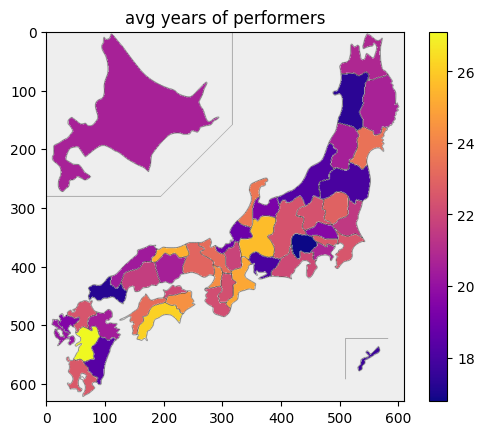

In [277]:
# heatmap
df = performer_history.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["history"].min(), vmax=df["history"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["history"].apply(fcol))
plt.colorbar(plt.imshow(pic, cmap, norm))
plt.title("avg years of performers")
plt.show()

#### 事務所ごとの、都道府県ごとの「芸人の人数」


In [288]:
import plotly.express as px

office_count = performer_data_df_noDup["office"].value_counts()
office_count = office_count[office_count > 10]

px.bar(
    office_count,
    title="num of performers in each office"
)

In [279]:
# 吉本興業、ワタナベエンターテインメント、松竹芸能、太田プロダクションについて可視化

yoshimoto_num = pd.DataFrame(performer_data_df_noDup[performer_data_df_noDup["office"] == "吉本興業"]["birthplace"].value_counts()).reset_index()
yoshimoto_num = pd.merge(yoshimoto_num, df_latlon, left_on="birthplace", right_on="nam_ja")

watanabe_num = pd.DataFrame(performer_data_df_noDup[performer_data_df_noDup["office"] == "ワタナベエンターテインメント"]["birthplace"].value_counts()).reset_index()
watanabe_num = pd.merge(watanabe_num, df_latlon, left_on="birthplace", right_on="nam_ja")

shochiku_num = pd.DataFrame(performer_data_df_noDup[performer_data_df_noDup["office"] == "松竹芸能"]["birthplace"].value_counts()).reset_index()
shochiku_num = pd.merge(shochiku_num, df_latlon, left_on="birthplace", right_on="nam_ja")

ota_num = pd.DataFrame(performer_data_df_noDup[performer_data_df_noDup["office"] == "太田プロダクション"]["birthplace"].value_counts()).reset_index()
ota_num = pd.merge(ota_num, df_latlon, left_on="birthplace", right_on="nam_ja")

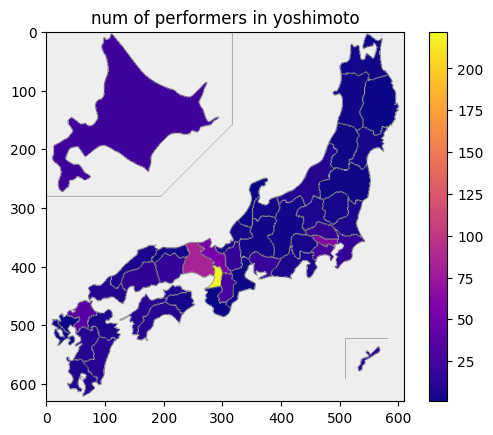

In [280]:
# heatmap
df = yoshimoto_num.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["count"].min(), vmax=df["count"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["count"].apply(fcol))
plt.colorbar(plt.imshow(pic, cmap, norm))
plt.title("num of performers in yoshimoto")
plt.show()

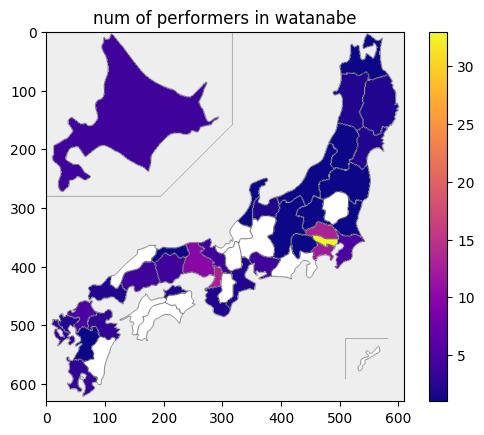

In [281]:
# heatmap
df = watanabe_num.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["count"].min(), vmax=df["count"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["count"].apply(fcol))
plt.colorbar(plt.imshow(pic, cmap, norm))
plt.title("num of performers in watanabe")
plt.show()

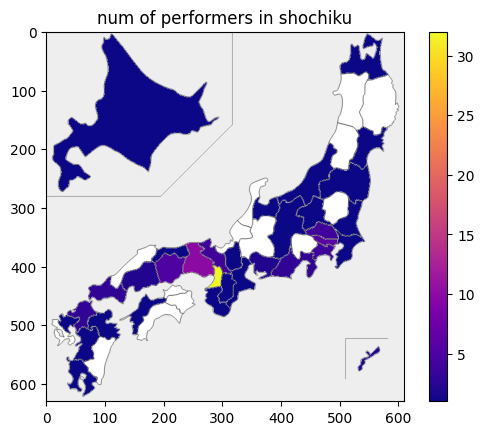

In [282]:
# heatmap
df = shochiku_num.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["count"].min(), vmax=df["count"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["count"].apply(fcol))
plt.colorbar(plt.imshow(pic, cmap, norm))
plt.title("num of performers in shochiku")
plt.show()

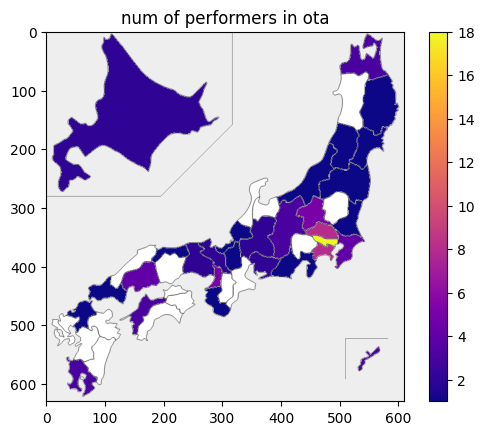

In [283]:
# heatmap
df = ota_num.sort_values("pref_code").set_index("pref_code")
cmap = plt.get_cmap("plasma")
norm = plt.Normalize(vmin=df["count"].min(), vmax=df["count"].max())
fcol = lambda x: "#" + bytes(cmap(norm(x), bytes=True)[:3]).hex()
pic = picture(df["count"].apply(fcol))
plt.colorbar(plt.imshow(pic, cmap, norm))
plt.title("num of performers in ota")
plt.show()

#### 事務所ごとの「平均ユニット人数」


In [290]:
# 事務所ごとのユニット数（重複を除去していないデータを使用）
unit_num_per_office = performer_data_df_trimmed[["office", "unit_name"]].groupby("office").nunique().reset_index()
unit_num_per_office

,office,unit_name
0,ASH&Dコーポレーション,6
1,CREATIVE OFFICE CUE,1
2,K-PRO,2
3,NAMARA,1
4,POP One,1
...,...,...
96,落語協会,2
97,落語芸術協会,2
98,融合事務所,2
99,西口エンタテインメント,2


In [295]:
avg_unit_member_num = pd.DataFrame(performer_data_df_trimmed["office"].value_counts()).reset_index()
avg_unit_member_num = pd.merge(avg_unit_member_num, unit_num_per_office)
avg_unit_member_num["avg_unit_member_num"] = avg_unit_member_num["count"] / avg_unit_member_num["unit_name"]
avg_unit_member_num = avg_unit_member_num[avg_unit_member_num["count"] > 10]
avg_unit_member_num


,office,count,unit_name,avg_unit_member_num
0,吉本興業,907,554,1.637184
1,その他,342,301,1.136213
2,ワタナベエンターテインメント,181,115,1.573913
3,松竹芸能,113,77,1.467532
4,太田プロダクション,107,68,1.573529
5,よしもとクリエイティブ・エージェンシー,98,79,1.240506
6,フリー,83,79,1.050633
7,サンミュージック,83,59,1.406780
8,プロダクション人力舎,82,48,1.708333
9,マセキ芸能社,77,51,1.509804


In [299]:
px.bar(
    avg_unit_member_num,
    x="office",
    y="avg_unit_member_num",
    title="avg num of unit members in each office"
)

#### 事務所ごとの「ユニットの構成」

In [320]:
# 吉本興業、ワタナベエンターテインメント、松竹芸能、太田プロダクションについて可視化

unit_noDup = performer_data_df_trimmed.drop_duplicates(subset="unit_name", keep="first")

yoshimoto_unit = pd.DataFrame(unit_noDup[unit_noDup["office"] == "吉本興業"]["unit"].value_counts()).reset_index()
watanabe_unit = pd.DataFrame(unit_noDup[unit_noDup["office"] == "ワタナベエンターテインメント"]["unit"].value_counts()).reset_index()
shochiku_unit = pd.DataFrame(unit_noDup[unit_noDup["office"] == "松竹芸能"]["unit"].value_counts()).reset_index()
ota_unit = pd.DataFrame(unit_noDup[unit_noDup["office"] == "太田プロダクション"]["unit"].value_counts()).reset_index()

In [323]:
px.pie(
    yoshimoto_unit,
    names="unit",
    values="count",
    title="unit in yoshimoto"
)

In [324]:
px.pie(
    watanabe_unit,
    names="unit",
    values="count",
    title="unit in watanabe"
)

In [325]:
px.pie(
    shochiku_unit,
    names="unit",
    values="count",
    title="unit in shochiku"
)

In [326]:
px.pie(
    ota_unit,
    names="unit",
    values="count",
    title="unit in ota"
)